In [23]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_ollama import ChatOllama
from langgraph.checkpoint.memory import MemorySaver
# import operator
import os 
from dotenv import load_dotenv

In [ ]:
llm = ChatOllama(model = 'gemini-3-flash-preview:cloud')
load_dotenv()

True

In [25]:
from langgraph.graph.message import add_messages
#  Define the state

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]


In [19]:
def chat_node(state: ChatState):

    # take user query from state 
    messages = state['messages']

    # send to llm 
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [20]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

# add nodes 
graph.add_node('chat_node', chat_node)

# add edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

# compile 
chatbot = graph.compile(checkpointer = checkpointer)

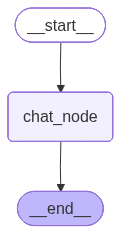

In [21]:
chatbot

In [8]:
initial_state = {
    'messages': [HumanMessage(content='What is the capital of India')]
}

chatbot.invoke(initial_state)['messages'][-1].content

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [22]:
thread_id = '1'

while True:

    user_message = input('Type here: ')

    print('User: ', user_message)
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    config = {'configurable': {'thread_id': thread_id}}
    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
    print('AI: ', response['messages'][-1].content)

User:  Hey


ResponseError: model requires more system memory (2.3 GiB) than is available (2.3 GiB) (status code: 500)